# Notebook to showcase usage of ultra-analytics YOLO V8
- Note that this library is not open sourced for commercial uses.

In [6]:
from ultralytics import YOLO
import torch
import cv2 
import numpy as np
import pathlib
import matplotlib.pyplot as plt

%matplotlib inline

# Load the model and Image

In [3]:
img = 'https://ultralytics.com/images/bus.jpg'
model = YOLO('yolov8n.pt')
results = model(img)

100%|██████████| 476k/476k [00:00<00:00, 1.81MB/s]


image 1/1 /home/howt/work/til-24-curriculum/cv_vlm/unit2/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 121.7ms
Speed: 3.4ms preprocess, 121.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 480)


# Plot the result

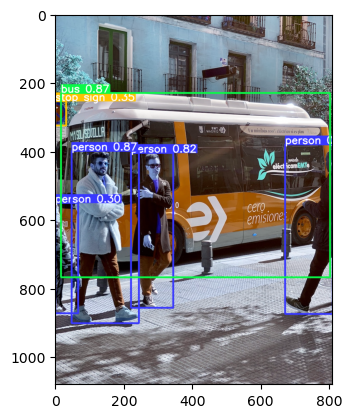

In [11]:
res_plotted = results[0].plot()
plt.imshow(res_plotted)

In [12]:
model = YOLO("yolov8n.pt")
camera = cv2.VideoCapture(0)
img_counter = 0

while True:
    ret, frame = camera.read()

    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_path = "path/opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_path, frame)
        outs = model.predict(img_path)
        img_counter += 1

camera.release()

failed to grab frame


[ WARN:0@524.581] global cap_v4l.cpp:997 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@524.582] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range
